# 준비

## 라이브러리 호출

In [1]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.layers import BatchNormalization

## fmnist 데이터 호출

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

## Helper function

In [3]:
def show_lcurve(hists, titles, colors=["r","g","b","k"], size=(12,4), x_itv=1, lw=1):
    plt.figure(figsize=size)
    plt.style.use("seaborn-white")
    # loss 
    plt.subplot(121)
    for i, hist in enumerate(hists):
        loss = hist.history['loss']
        val_loss = hist.history['val_loss']
        epochs = range(1, 1+len(loss))
        xbins = range(0, len(loss)+1, x_itv)
        plt.plot(epochs, loss, lw=lw,linestyle=':', label=f'{titles[i]} train loss', c=colors[i])
        plt.plot(epochs, val_loss, lw=lw,marker='.', label=f'{titles[i]} valid loss', c=colors[i])
        plt.legend();plt.grid(True);plt.xticks(xbins)
        plt.xlabel('Epochs');plt.ylabel('Loss')
        x, y = epochs[-1], hist.history['loss'][-1]
        plt.text(x, y, np.round(y,2), c=colors[i])
        x, y = epochs[-1], hist.history['val_loss'][-1]
        plt.text(x, y, np.round(y,2), c=colors[i])

    # acc
    plt.subplot(122)
    for i, hist in enumerate(hists):
        acc = hist.history['acc']
        val_acc = hist.history['val_acc']
        plt.plot(epochs, acc, linestyle=':', lw=lw,label=f'{titles[i]} train acc', c=colors[i])
        plt.plot(epochs, val_acc, marker='.', lw=lw,label=f'{titles[i]} valid acc', c=colors[i])
        plt.legend();plt.grid(True);plt.xticks(xbins)
        plt.xlabel('Epochs');plt.ylabel('Acc')
        x, y = epochs[-1], hist.history['acc'][-1]
        plt.text(x, y, np.round(y,2), c=colors[i])
        x, y = epochs[-1], hist.history['val_acc'][-1]
        plt.text(x, y, np.round(y,2), c=colors[i])
    plt.show()

# 데이터 전처리

In [4]:
num_classes = 100
input_shape = (32, 32, 3)
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


# 모델링 및 학습

## Normal model

In [8]:
normal_model = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(num_classes, activation="softmax"),
])

In [9]:
batch_size = 128
epochs = 15
normal_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])
normal_histoty=normal_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1,verbose=0)

## Batch_normalization model

In [10]:
bn_model = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.BatchNormalization(),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(num_classes, activation="softmax"),
])

In [11]:
batch_size = 128
epochs = 15
bn_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])
bn_histoty=bn_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1,verbose=0)

# result

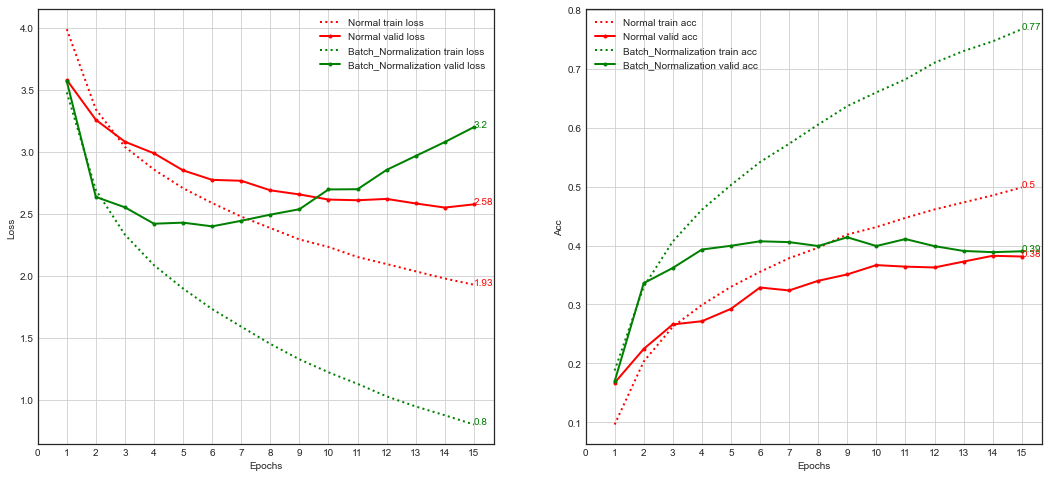

In [12]:
show_lcurve([normal_histoty, bn_histoty],["Normal", "Batch_Normalization"], size=(18, 8),x_itv=1, lw=2)